<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Bank_Calls_Success_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting Drive to notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import os

## Load Dataset

In [4]:
DATASET_FOLDER_PATH = "/content/drive/MyDrive/Datasets/bank-additional/bank-additional"

In [5]:
for files in os.listdir(DATASET_FOLDER_PATH):
  print(files)

bank-additional.csv
.Rhistory
.DS_Store
bank-additional-full.csv
.ipynb_checkpoints
bank-additional-names.txt
metadata.md


In [6]:
def load_data(data_dir, separator):
    from sklearn.model_selection import train_test_split
    df_train = pd.read_csv(os.path.join(data_dir, "bank-additional-full.csv"), sep=separator)
    df_train, df_test = train_test_split(df_train, test_size=0.3, random_state=42)
    df_val = pd.read_csv(os.path.join(data_dir, "bank-additional.csv"), sep=separator)
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    return df_train, df_test, df_val

In [7]:
df_train, df_test, df_val = load_data(DATASET_FOLDER_PATH, ";")

## Explore Dataset

| Variable Name | Role | Type | Description | Units | Missing Values |
|---|---|---|---|---|---|
| age | Feature | Integer | Age of a person| no |
| job | Feature | Categorical | Occupation, type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') | no |
| marital | Feature | Categorical | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) | no |
| education | Feature | Categorical | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | no |
| default | Feature | Binary | has credit in default? | no |
| balance | Feature | Integer | average yearly balance | euros | no |
| housing | Feature | Binary | has housing loan? | no |
| loan | Feature | Binary | has personal loan? | no |
| contact | Feature | Categorical | contact communication type | (categorical: 'cellular','telephone') | yes |
| day_of_week | Feature | Date | last contact day of the week |
| month | Feature | Date | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') | no |
| duration | Feature | Integer | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). <br />Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. <br />Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. | no |
| campaign | Feature | Integer | number of contacts performed during this campaign and for this client (numeric, includes last contact) | no |
| pdays | Feature | Integer | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) | yes |
| previous | Feature | Integer | number of contacts performed before this campaign and for this client | no |
| poutcome | Feature | Categorical | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') | yes |
| y | Target | Binary | has the client subscribed a term deposit? | no |


Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014].
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001


1.  Title: Bank Marketing (with social/economic context)

2.  Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

4. Relevant Information:

   This dataset is based on *Bank Marketing* UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
   The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns).
   Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table(*bank-additional-full.csv*, header=TRUE,sep=*;*)
   
   The zip file includes two datasets:
      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

5. Number of Instances: 41188 for bank-additional-full.csv

6. Number of Attributes: 20 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2014].

   Input variables:
   # bank client data:

| no | column name | description |
|----|-------------|-------------|
| 1 | age (numeric) | Age of customer |
| 2 | job | type of job<br />(categorical: *admin.*, *blue-collar*, *entrepreneur*, *housemaid*, *management*, *retired*, *self-employed*, *services*, *student*, *technician*, *unemployed*, *unknown*) |
| 3 | marital | marital status<br /> (categorical: *divorced*, *married*, *single*, *unknown*; note: *divorced* means divorced or widowed) |
| 4 | education | Education level<br /> (categorical: *basic.4y*, *basic.6y*, *basic.9y*, *high.school*, *illiterate*, *professional.course*, *university.degree*, *unknown*) |
 | 5 | default | has credit in default?<br /> (categorical: *no*, *yes*, *unknown*) |
 | 6 | housing |has housing loan?<br /> (categorical: *no*, *yes*, *unknown*) |
 | 7 | loan | has personal loan?<br /> (categorical: *no*, *yes*, *unknown*) |
 | |  | # related with the last contact of the current campaign: |
 | 8 | contact | contact communication type<br /> (categorical: *cellular*, *telephone*)  |
 | 9 | month | last contact month of year<br /> (categorical: *jan*,  *feb*,  *mar*,  ..., *nov*,  *dec*)
| 10 | day_of_week | last contact day of the week<br /> (categorical: *mon*, *tue*, *wed*, *thu*, *fri*)
| 11 | duration | last contact duration, in seconds (numeric).<br /> Important note:  this attribute highly affects the output target (e.g., if duration=0 then y=*no*). <br />Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.<br />Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |
| |  | # other attributes:
| 12 | campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| 13 | pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| 14 | previous | number of contacts performed before this campaign and for this client (numeric) |
| 15 | poutcome | outcome of the previous marketing campaign<br /> (categorical: *failure*, *nonexistent*, *success*) |
| | | # social and economic context attributes
| 16 | emp.var.rate | employment variation rate - quarterly indicator (numeric)
| 17 | cons.price.idx | consumer price index - monthly indicator (numeric)     
| 18 | cons.conf.idx | consumer confidence index - monthly indicator (numeric)|   
| 19 | euribor3m | euribor 3 month rate - daily indicator (numeric) |
| 20 | nr.employed | number of employees - quarterly indicator (numeric) |


  ** Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: *yes*, *no*) **

8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the *unknown* label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


| Column Type | Column Names |
|---|---|
| Numeric | age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed |
| Object | job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y |
| Categorical | job, marital, education, default, housing, loan, contact, month, day_of_week, previous, poutcome, y |

### Exploring Functions

#### Exploration

In [ ]:
def get_numeric_or_categorical_columns(df, categorical_threshold=10):
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    object_cols = df.select_dtypes(include='object').columns.tolist()
    categorical_cols = [
        col for col in df.columns
        if (col not in numeric_cols) or
        df[col].nunique()<categorical_threshold
    ]
    return numeric_cols, object_cols, categorical_cols

In [ ]:
def calculate_woe(df, feature, target):
    unique_targets = df[target].unique()
    if len(unique_targets) != 2:
        raise ValueError(f"Target column '{target}' should have exactly 2 unique values.")
    total_good = df[target].value_counts().iloc[0]
    total_bad = df[target].value_counts().iloc[1]
    woe_dict = {}
    for category in df[feature].unique():
        good = df[(df[feature] == category) & (df[target] == unique_targets[0])].shape[0]
        bad = df[(df[feature] == category) & (df[target] == unique_targets[1])].shape[0]
        good = good + 0.05 if good == 0 else good
        bad = bad + 0.05 if bad == 0 else bad
        p_good = good / total_good
        p_bad = bad / total_bad
        woe = np.log(p_good / p_bad) if p_bad != 0 else 0
        woe_dict[category] = woe
    return woe_dict

#### Visualization

In [ ]:
def get_univariate_distribution_plot(df, column_names=[], hue=None, plotType="", ticks_rotation=0):
    n = len(column_names)
    ncols = int(np.ceil(np.sqrt(n)))
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 5 * nrows))
    if(isinstance(axes, np.ndarray)):
        axes = axes.flatten()
    else:
        axes = [axes]
    for i, col in enumerate(column_names):
        match plotType:
            case "kde":
                sns.kdeplot(x=col, data=df, ax=axes[i], hue=hue)
            case "count":
                sns.countplot(x=col, data=df, ax=axes[i], hue=hue)
            case "box":
                sns.boxplot(x=col, data=df, ax=axes[i], hue=hue)
            case "histogram":
                sns.histplot(x=col, data=df, ax=axes[i], hue=hue)
            case "violin":
                sns.violinplot(x=col, data=df, ax=axes[i], hue=hue)
            case "distplot":
                sns.distplot(x=col, data=df, ax=axes[i], hue=hue)
            case _:
                sns.histplot(x=col, data=df, ax=axes[i], hue=hue, kde=True)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].xaxis.set_ticks_position('none')
        axes[i].yaxis.set_ticks_position('none')
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].tick_params(axis='x', rotation=ticks_rotation, which='major', direction='out')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


In [ ]:
def get_bivariate_distribution_plot(df, column_names=[], hue=None, plotType="", ticks_rotation=0):

    n = len(column_names)
    ncols = int(np.ceil(np.sqrt(n)))
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 5 * nrows))
    if(isinstance(axes, np.ndarray)):
        axes = axes.flatten()
    else:
        axes = [axes]
    for i, (xcol, ycol)in enumerate(column_names):
        match plotType:
            case "scatter":
                sns.scatterplot(x=xcol, y=ycol, data=df, ax=axes[i], hue=hue)
            case "line":
                sns.lineplot(x=xcol, y=ycol, data=df, ax=axes[i], hue=hue)
            case "joint":
                sns.jointplot(x=xcol, y=ycol, data=df, kind="hex")
            case "kde":
                sns.kdeplot(x=xcol, y=ycol, data=df, ax=axes[i], hue=hue)
            case "violin":
                sns.violinplot(x=xcol, y=ycol, data=df, ax=axes[i], hue=hue)
            case "reg":
                sns.regplot(x=xcol, y=ycol, data=df, ax=axes[i], hue=hue)
            case "bar":
                sns.barplot(x=xcol, y=ycol, data=df, ax=axes[i], hue=hue)
            case "box":
                sns.boxplot(x=xcol, y=ycol, data=df, ax=axes[i], hue=hue)
            case _:
                sns.scatterplot(x=xcol, y=ycol, data=df, ax=axes[i], hue=hue)
        axes[i].set_title(f'Distribution of {xcol} vs {ycol}')
        axes[i].xaxis.set_ticks_position('none')
        axes[i].yaxis.set_ticks_position('none')
        axes[i].spines['right'].set_visible(False)
        axes[i].spines['top'].set_visible(False)
        axes[i].tick_params(axis='x', rotation=ticks_rotation, which='major', direction='out')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


### manupulation functions

In [ ]:
def convert_discrete_columns_to_category(df, exclude_cols=[], threshold=10):
    """Converts columns with discrete values in a DataFrame to the 'category' data type.

    Args:
        df: The input pandas DataFrame.
        threshold: The maximum number of unique values for a column to be considered discrete.

    Returns:
        A new DataFrame with specified columns converted to 'category' type.
    """
    df = df.copy()
    for col in df.columns:
        if (
            df[col].dtype == 'object' or
            df[col].nunique() < threshold
        ) and col not in exclude_cols:
            df[col] = df[col].astype('category')

    return df


In [ ]:
def encode_categorical_columns(df, categorical_cols):
    """Encodes categorical columns in a DataFrame using one-hot encoding.
    Args:
        df: The input pandas DataFrame.
        categorical_cols: A list of column names to be encoded.
    Returns:
        A new DataFrame with the specified categorical columns encoded.
    """
    df = df.copy()
    for col in categorical_cols:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        df = df.drop(col, axis=1)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower=0.05, upper=0.95):
        self.lower = lower
        self.upper = upper
        self.lower_limit = None
        self.upper_limit = None

    def fit(self, X, y=None):
        self.lower_limit = np.percentile(X, self.lower * 100, axis=0)
        self.upper_limit = np.percentile(X, self.upper * 100, axis=0)
        print(self.lower_limit, self.upper_limit)
        return self

    def transform(self, X):
        return np.clip(X, self.lower_limit, self.upper_limit)

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y)
        return self.transform(X)


In [ ]:
from sklearn.preprocessing import PowerTransformer

class BoxCoxTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.pt = PowerTransformer(method='box-cox')

    def fit(self, X, y=None):
        self.pt.fit(X)
        return self

    def transform(self, X):
        return self.pt.transform(X)

    def fit_transform(self, X, y=None, **fit_params):
        return self.pt.fit_transform(X)


### exploring

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  duration        28831 non-null  int64  
 11  campaign        28831 non-null  int64  
 12  pdays           28831 non-null  int64  
 13  previous        28831 non-null  int64  
 14  poutcome        28831 non-null  object 
 15  emp.var.rate    28831 non-null  float64
 16  cons.price.idx  28831 non-null  float64
 17  cons.conf.idx   28831 non-null 

In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
numeric_cols, object_cols, categorical_cols = get_numeric_or_categorical_columns(df_train)
print(f"Numeric columns: {numeric_cols}")
print(f"Object columns: {object_cols}")
print(f"Categorical columns: {categorical_cols}")

Numeric columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Object columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'y']


In [ ]:
df_train.head()

age          job  marital          education  default housing loan  \
0   29       admin.  married  university.degree       no      no   no   
1   29   technician   single  university.degree       no      no   no   
2   45  blue-collar  married           basic.6y  unknown     yes   no   
3   34     services  married  university.degree       no      no   no   
4   32       admin.   single        high.school       no      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   dec         mon  ...         3    999         1      failure   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   may         thu  ...         2    999         0  nonexistent   
3   cellular   may         thu  ...         1    999         1      failure   
4   cellular   may         fri  ...         9    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -3.0          92.713          -33.0      0.709       5023.5  no  
1         -1.8          92.893          -46.2      1.250       5099.1  no  
2          1.1          93.994          -36.4      4.860       5191.0  no  
3         -1.8          92.893          -46.2      1.327       5099.1  no  
4         -1.8          92.893          -46.2      1.250       5099.1  no  

[5 rows x 21 columns]

In [ ]:
df_train.describe().T

count         mean         std       min       25%  \
age             28831.0    40.011203   10.450128    17.000    32.000   
duration        28831.0   257.875134  260.212911     0.000   102.000   
campaign        28831.0     2.575769    2.752303     1.000     1.000   
pdays           28831.0   963.215844  185.077567     0.000   999.000   
previous        28831.0     0.172592    0.494338     0.000     0.000   
emp.var.rate    28831.0     0.083202    1.570978    -3.400    -1.800   
cons.price.idx  28831.0    93.577264    0.579694    92.201    93.075   
cons.conf.idx   28831.0   -40.515091    4.634864   -50.800   -42.700   
euribor3m       28831.0     3.621599    1.735202     0.634     1.344   
nr.employed     28831.0  5167.011880   72.542598  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   318.000  4918.000  
campaign           2.000     3.000    43.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [ ]:
df_train[df_train['y']=='no'].describe().T

count         mean         std       min       25%  \
age             25580.0    39.927013    9.940317    17.000    32.000   
duration        25580.0   220.848006  208.809562     0.000    95.000   
campaign        25580.0     2.645231    2.858916     1.000     1.000   
pdays           25580.0   984.756919  118.057980     0.000   999.000   
previous        25580.0     0.132643    0.409958     0.000     0.000   
emp.var.rate    25580.0     0.251427    1.482712    -3.400    -1.800   
cons.price.idx  25580.0    93.605261    0.559924    92.201    93.075   
cons.conf.idx   25580.0   -40.601009    4.396974   -50.800   -42.700   
euribor3m       25580.0     3.812835    1.638781     0.634     1.405   
nr.employed     25580.0  5176.208432   64.832446  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    95.000  
duration         164.000   278.000  4918.000  
campaign           2.000     3.000    43.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.918    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.962     5.045  
nr.employed     5195.800  5228.100  5228.100

In [ ]:
df_train[df_train['y']=='yes'].describe().T

count         mean         std       min       25%       50%  \
age             3251.0    40.673639   13.804333    17.000    31.000    37.000   
duration        3251.0   549.217472  402.225998    37.000   255.000   442.000   
campaign        3251.0     2.029222    1.591344     1.000     1.000     2.000   
pdays           3251.0   793.723162  402.208786     0.000   999.000   999.000   
previous        3251.0     0.486927    0.856504     0.000     0.000     0.000   
emp.var.rate    3251.0    -1.240449    1.617026    -3.400    -1.800    -1.800   
cons.price.idx  3251.0    93.356977    0.677321    92.201    92.893    93.200   
cons.conf.idx   3251.0   -39.839065    6.154973   -50.800   -46.200   -40.400   
euribor3m       3251.0     2.116890    1.737706     0.634     0.849     1.266   
nr.employed     3251.0  5094.650200   87.731387  4963.600  5017.500  5099.100   

                     75%       max  
age               49.000    98.000  
duration         734.500  4199.000  
campaign           2.000    17.000  
pdays            999.000   999.000  
previous           1.000     6.000  
emp.var.rate      -0.100     1.400  
cons.price.idx    93.918    94.767  
cons.conf.idx    -36.100   -26.900  
euribor3m          4.191     5.045  
nr.employed     5191.000  5228.100

In [ ]:
convert_discrete_columns_to_category(df=df_train).describe(exclude=np.number).T.drop("top", axis=1)

count unique   freq
job          28831     12   7338
marital      28831      4  17368
education    28831      8   8530
default      28831      3  22849
housing      28831      3  15096
loan         28831      3  23733
contact      28831      2  18339
month        28831     10   9534
day_of_week  28831      5   6020
previous     28831      8  24907
poutcome     28831      3  24907
y            28831      2  25580

In [ ]:
df_train.nunique()

age                 77
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1432
campaign            40
pdays               26
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          312
nr.employed         11
y                    2
dtype: int64

In [ ]:
df_train[['pdays', 'y']].groupby('y').value_counts().unstack(fill_value=0).T

y         no   yes
pdays             
0          2     7
1         13     6
2         14    22
3         98   210
4         34    42
5         11    19
6         87   208
7         12    23
8          5     9
9         14    24
10        17    20
11         7    12
12        22    18
13         5    18
14         6     9
15         6    13
16         3     4
17         6     1
18         2     3
19         1     0
20         1     0
21         0     1
22         1     1
25         0     1
27         0     1
999    25213  2579

In [101]:
bin_edges = np.linspace(-1, 30, 5, dtype=np.int64)
bin_edges = np.append(bin_edges, [float('inf')])
bin_edges

array([-1.,  6., 14., 22., 30., inf])

In [107]:
df_train['pdays_classes'] = pd.cut(df_train['pdays'], bins=bin_edges, labels=["days", "weeks", 'fifteen-days', 'month', 'never'], include_lowest=True)
df_train['pdays_classes'].value_counts()

pdays_classes
never           27792
days              773
weeks             221
fifteen-days       43
month               2
Name: count, dtype: int64

In [106]:
woe_dict = calculate_woe(df_train, "pdays_classes", "y")
woe_dict

{4: 0.21710985278837483,
 0: -2.748243358584556,
 1: -2.475860468572476,
 2: -2.202610097204087,
 3: -5.751727608942865}

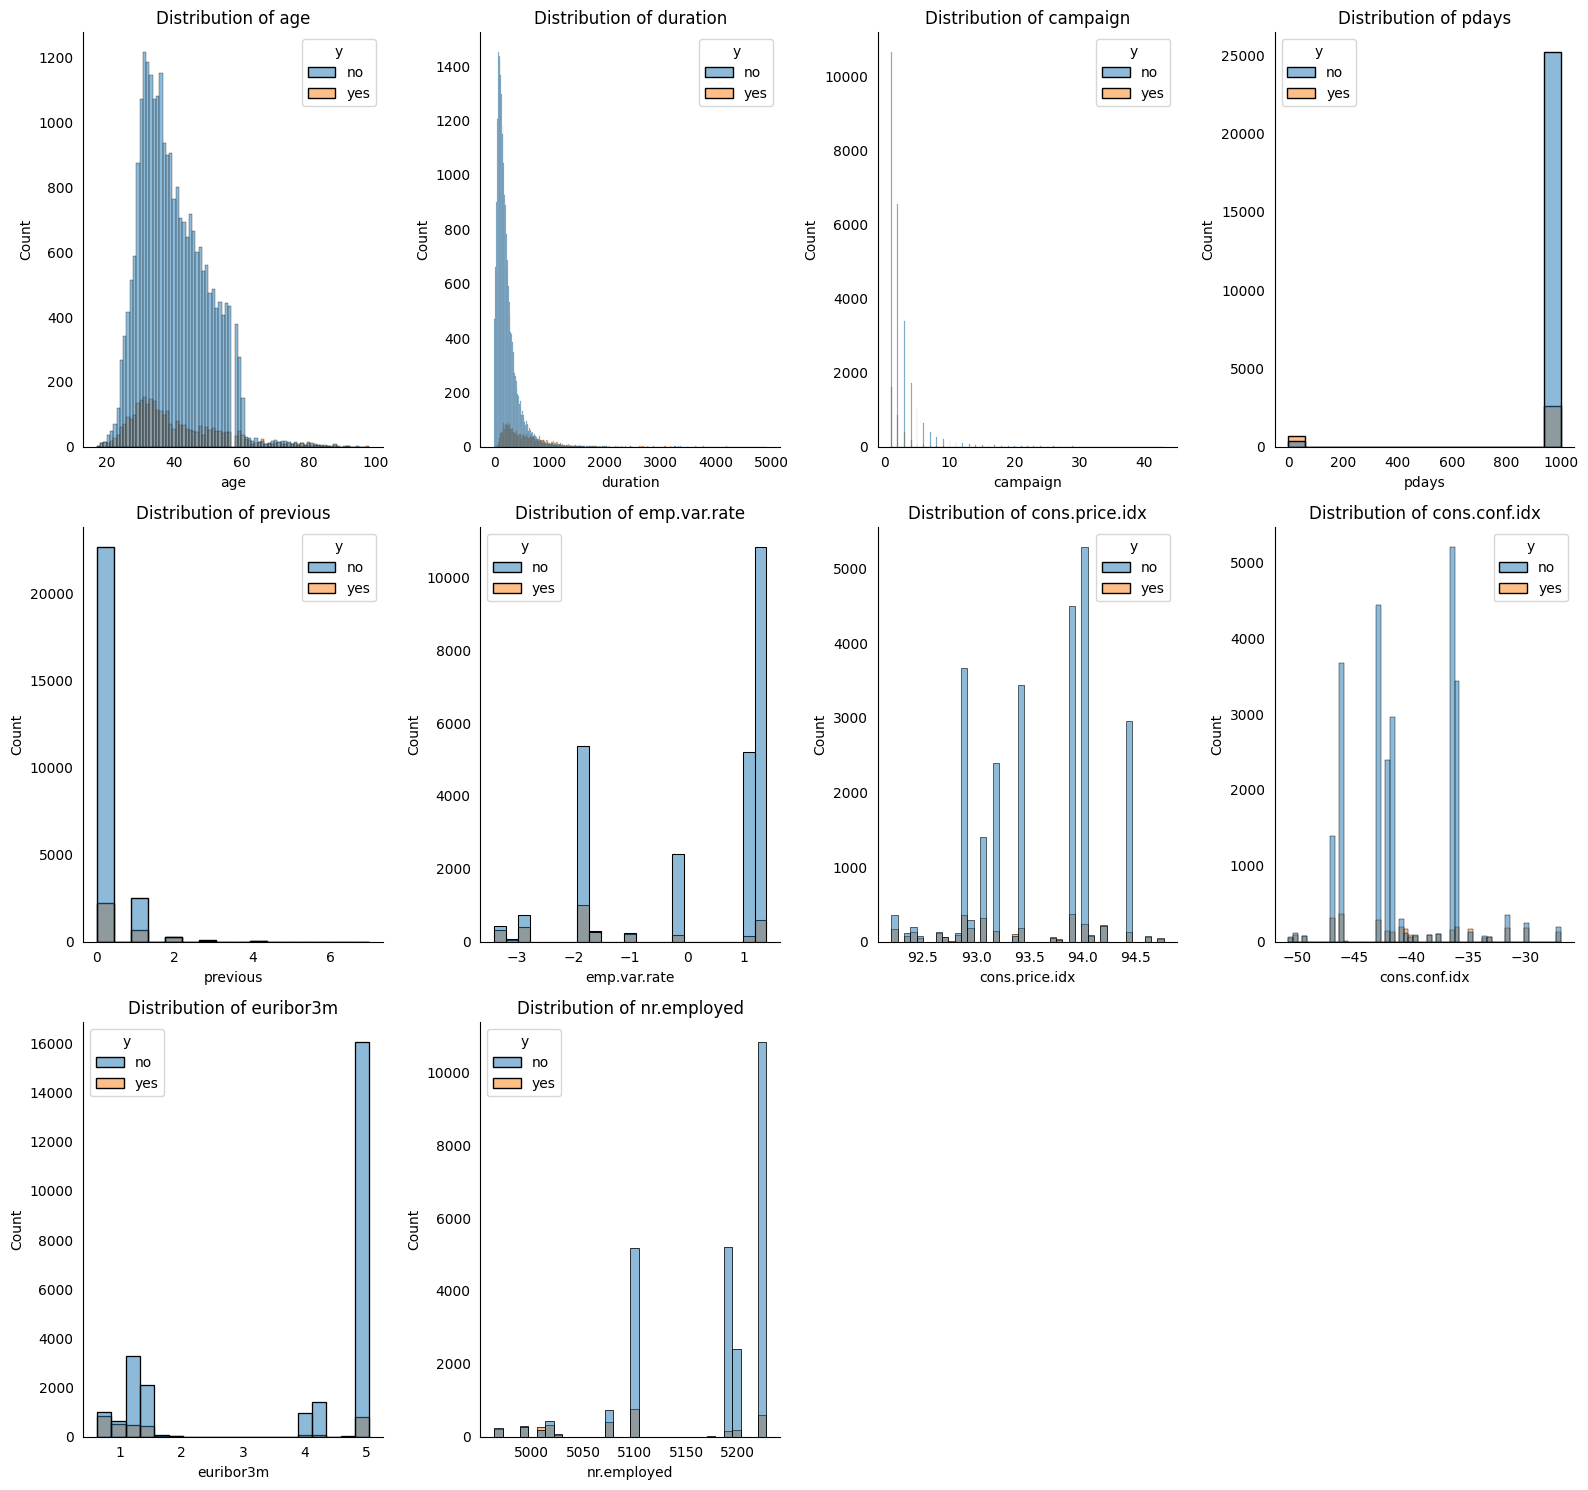

In [ ]:
get_univariate_distribution_plot(df_train, column_names=numeric_cols, hue='y', plotType="histogram")

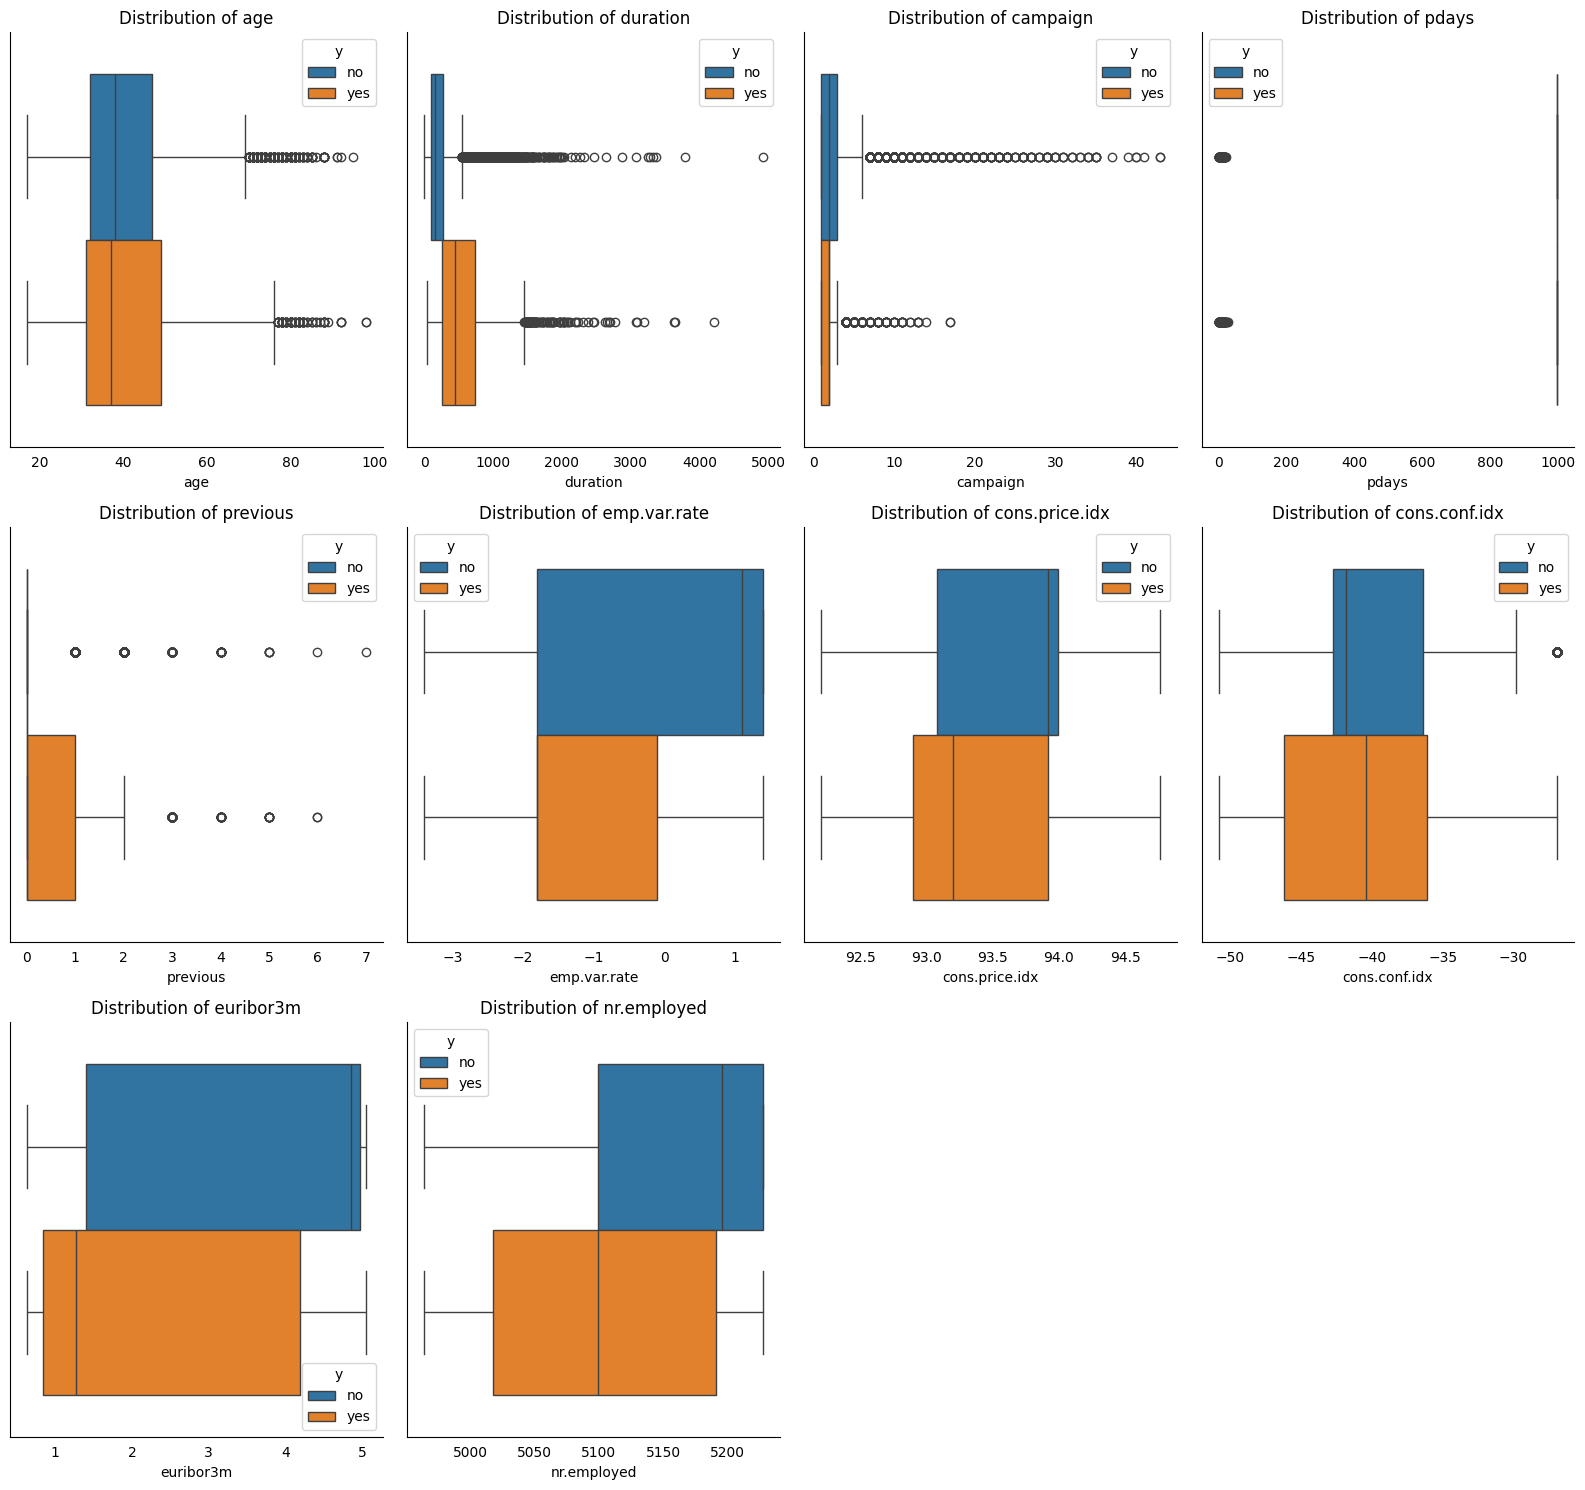

In [ ]:
get_univariate_distribution_plot(df_train, column_names=numeric_cols, hue='y', plotType="box")

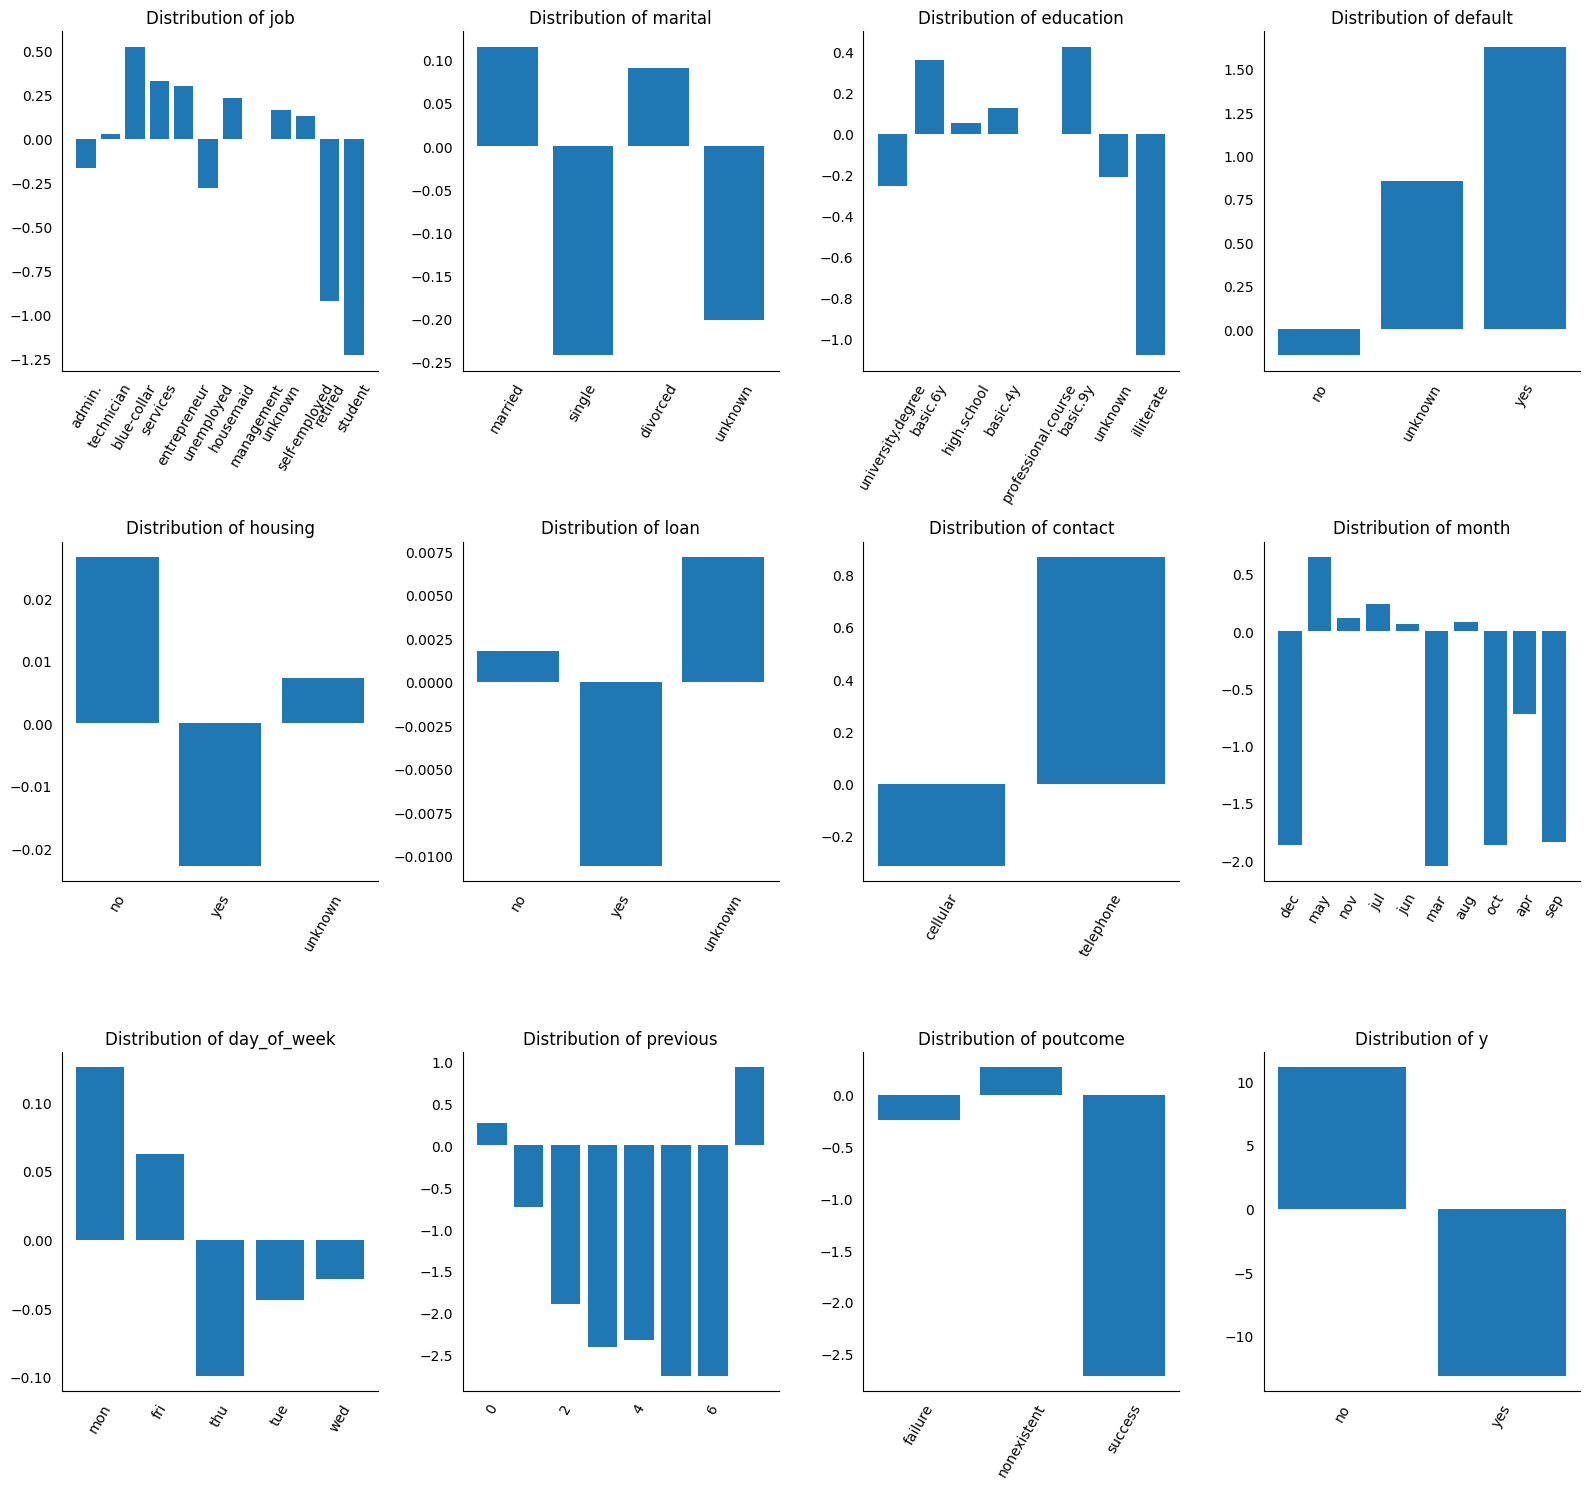

In [ ]:
calculate_woe(df_train, "job", "y")
column_names = categorical_cols
n = len(column_names)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 5 * nrows))
if(isinstance(axes, np.ndarray)):
    axes = axes.flatten()
else:
    axes = [axes]
for i, col in enumerate(column_names):
    woe_dict = calculate_woe(df_train, col, "y")
    axes[i].bar(woe_dict.keys(), woe_dict.values())
    axes[i].set_title(f'Distribution of {col}')
    axes[i].xaxis.set_ticks_position('none')
    axes[i].yaxis.set_ticks_position('none')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].tick_params(axis='x', rotation=60, which='major', direction='out')
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


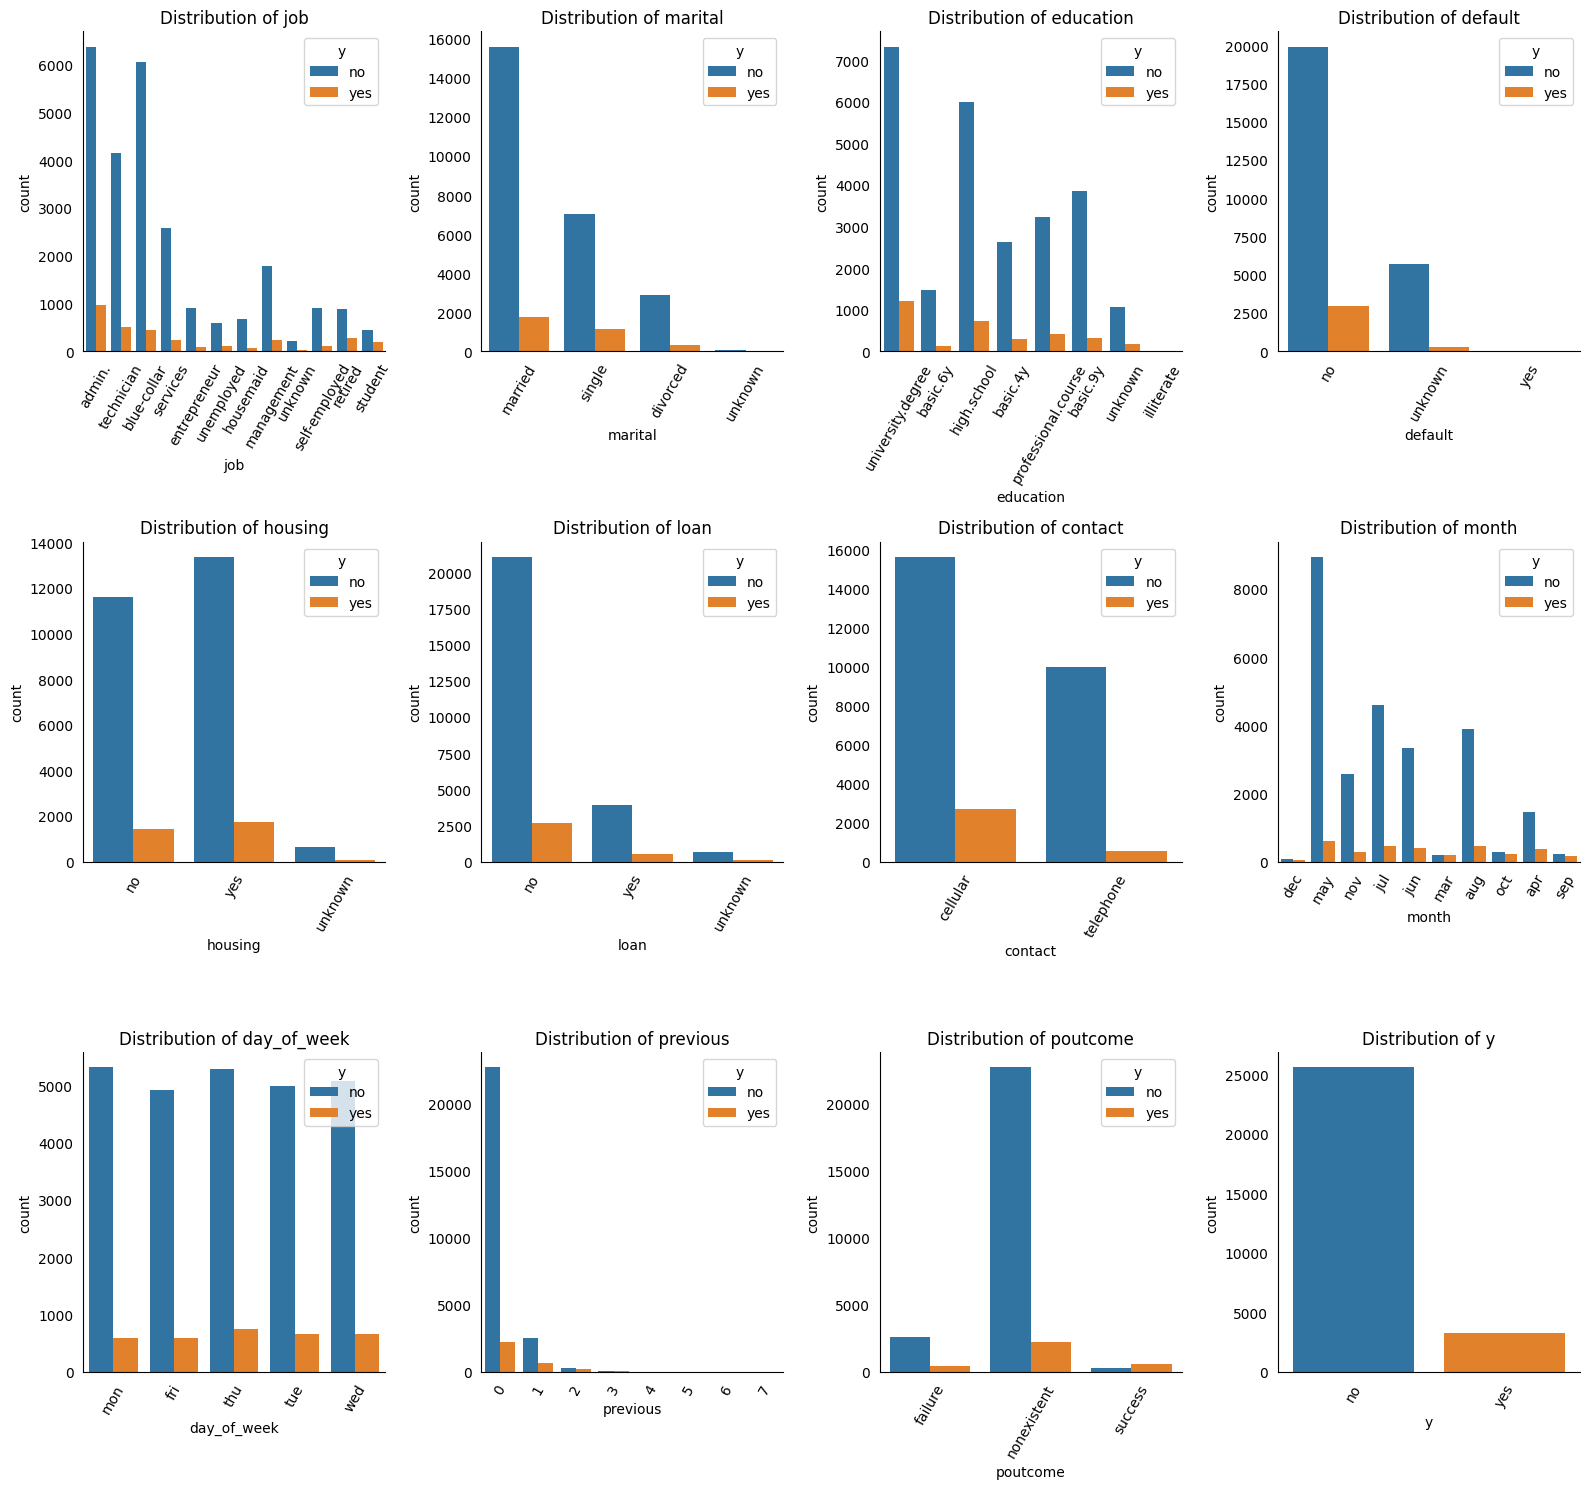

In [ ]:
get_univariate_distribution_plot(df_train, column_names=categorical_cols, hue='y', plotType="count", ticks_rotation=60)

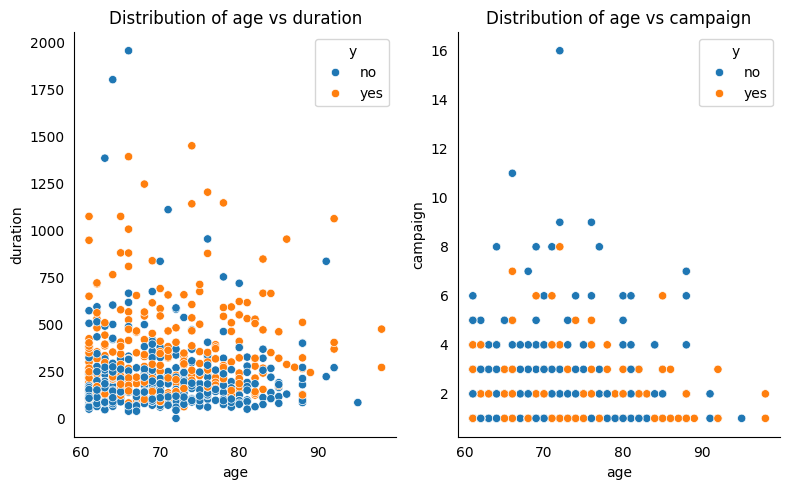

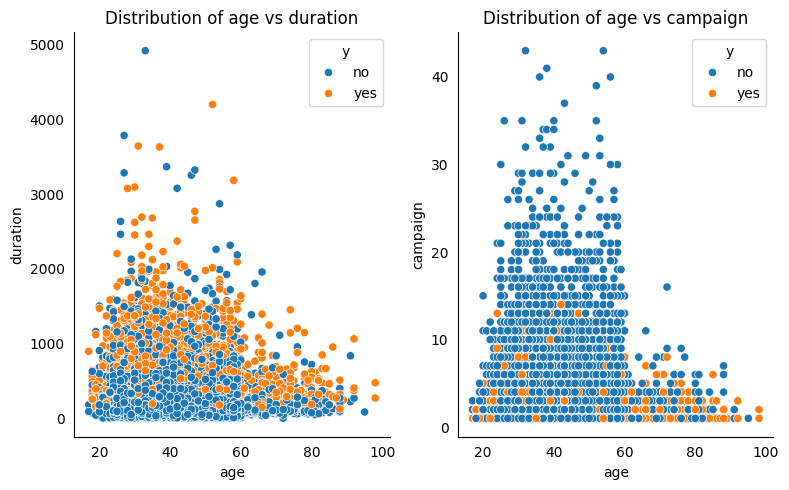

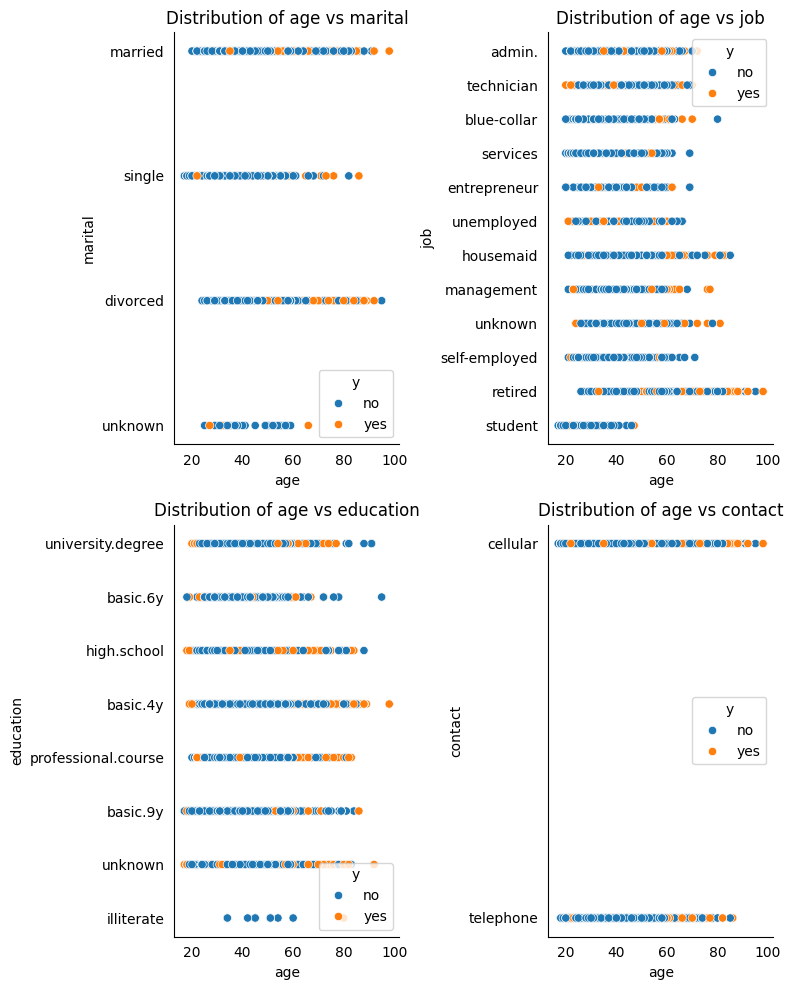

In [ ]:
get_bivariate_distribution_plot(df_train[df_train['age']>60], column_names=[('age', 'duration'), ('age', 'campaign')], hue='y', plotType="scatter")
get_bivariate_distribution_plot(df_train, column_names=[('age', 'duration'), ('age', 'campaign')], hue='y', plotType="scatter")
get_bivariate_distribution_plot(df_train, column_names=[('age', 'marital'), ('age', 'job'), ("age", "education"), ('age', 'contact')], hue='y', plotType="count")

In [ ]:
print(df_train[df_train['duration']>1500]['y'].value_counts())
print(df_train[df_train['duration']<60]['y'].value_counts())
print(df_train[df_train['campaign']>15]['y'].value_counts())
print(df_train[df_train['age']>80]['y'].value_counts())

y
yes    85
no     58
Name: count, dtype: int64
y
no     2915
yes       1
Name: count, dtype: int64
y
no     246
yes      2
Name: count, dtype: int64
y
no     43
yes    39
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
df_scaled = df_train.copy()
robust_columns = ['age', 'duration', ]
df_scaled['duration'] = df_scaled['duration']/60
df_scaled[numeric_cols] = rb.fit_transform(df_scaled[numeric_cols])


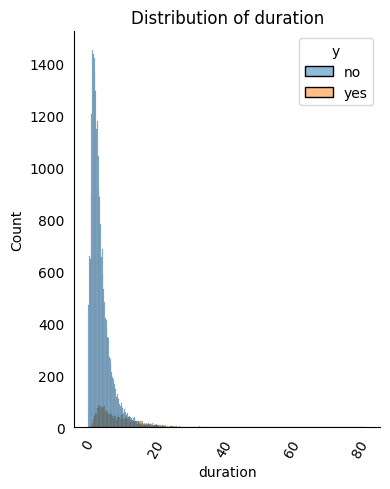

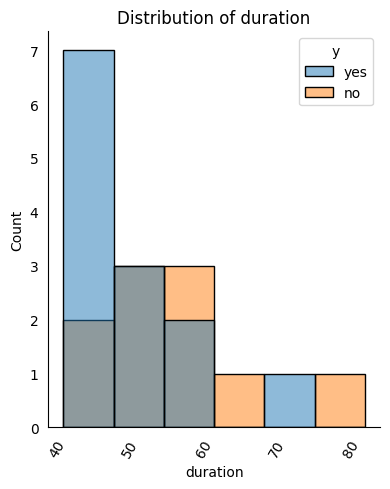

352

In [ ]:
duration_in_minutes = df_train[['duration', 'y']].copy()
duration_in_minutes['duration'] = duration_in_minutes['duration']/60

get_univariate_distribution_plot(duration_in_minutes, ["duration"], hue='y', plotType="histogram", ticks_rotation=60)
get_univariate_distribution_plot(duration_in_minutes[duration_in_minutes['duration']>40], ["duration"], hue='y', plotType="histogram", ticks_rotation=60)

len(duration_in_minutes[(duration_in_minutes['duration']>30)|(duration_in_minutes['duration']>20)])

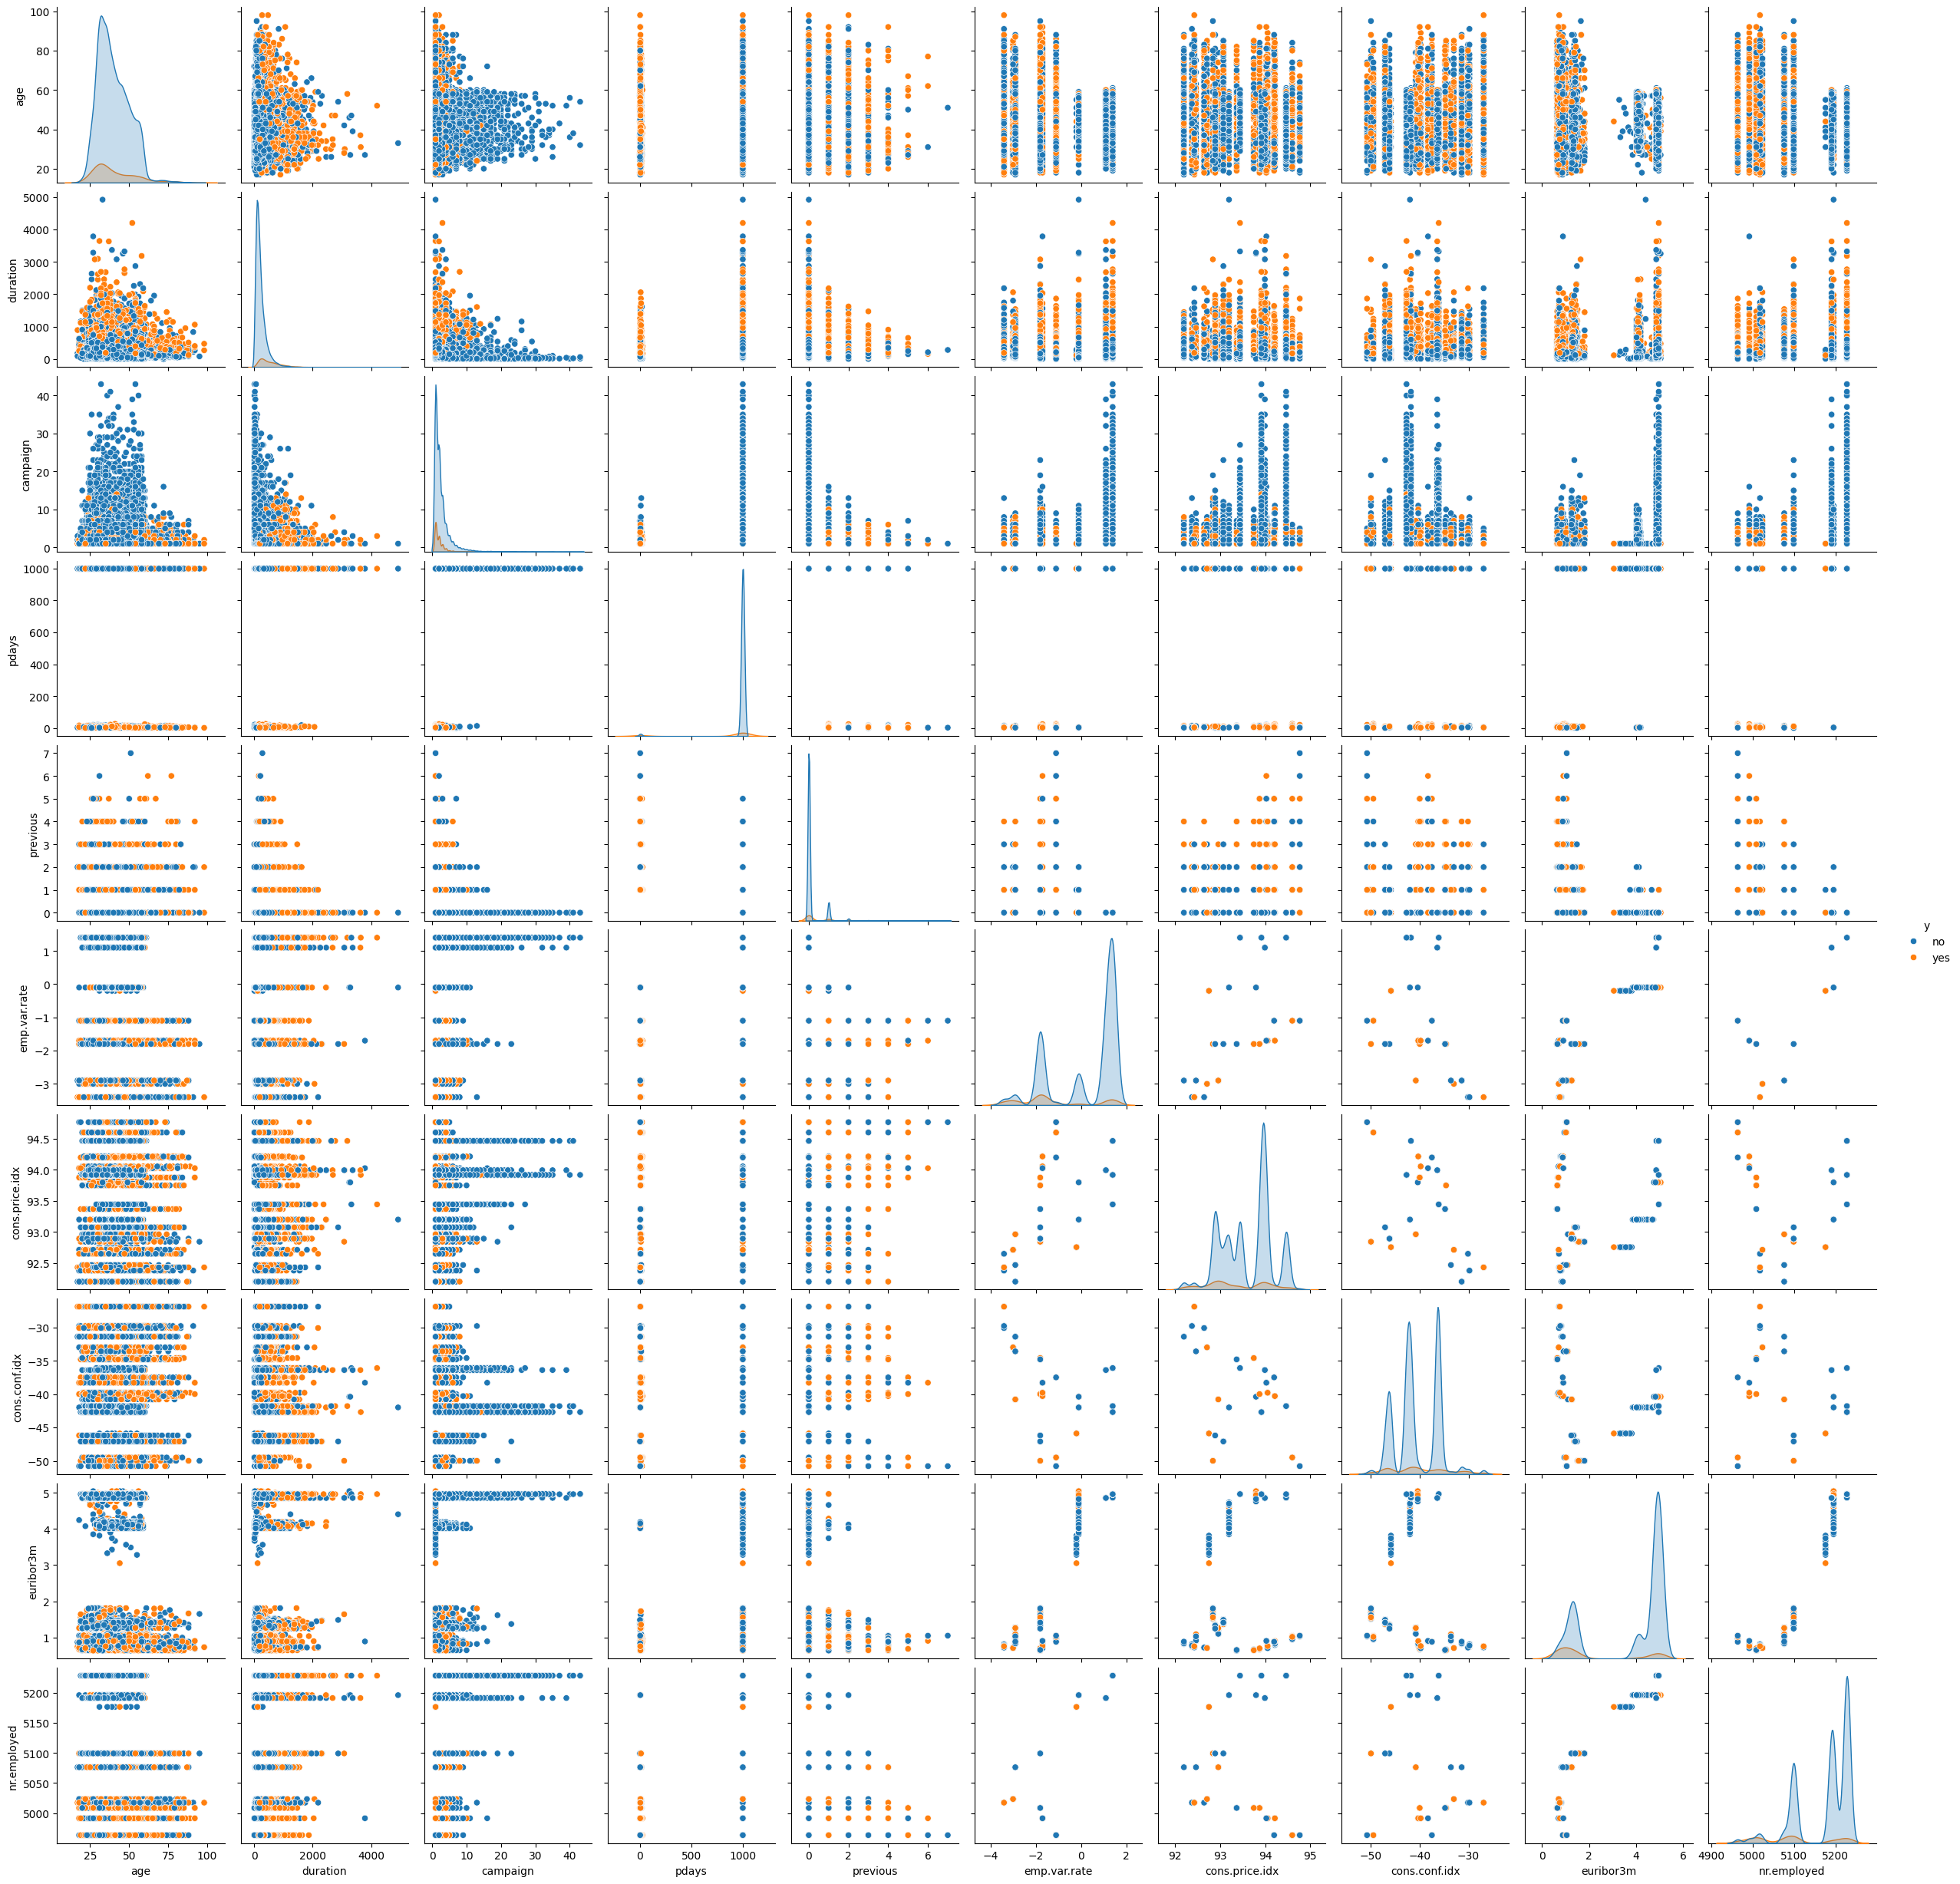

In [ ]:
sns.pairplot(df_train, hue='y')

 - For duration which has duration greater than 1500 has very less people, so we can drop them or we need to perform robust scaling over them.
 - duration will be converted to minutes or log scale but log scale will be better
 - for duration we should create a categorical column which will have values (-1, 0, 1) for to less or 0, moderate duration and high duration, and low will less than 1 min, high means greater than 20 minutes
 - we can convert duration where it is less than one minute, there is very little chance of saying yes, so we can just convert duration in minutes so that values becomes small and interpretable.
- Observation: For longer conversations, possibility of saying yes increases more than shorter convesations so convert these values to 999 mins (longer convesations)
 - for campaign value greater than 20 make them 20


In [ ]:
from scipy.stats.mstats import winsorize

def apply_winsorization(df, columns=[], limits = [0.1, 0.1]):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("df must be a pandas DataFrame")
    if not isinstance(columns, list):
        raise TypeError("columns must be a list")
    elif len(columns) == 0:
        columns = df.columns
    if not all(col in df.columns for col in columns):
        raise ValueError("All column names must exist in the DataFrame.")
    df = df.copy()
    winsorized_df = df[columns].apply(lambda x: winsorize(x, limits=limits))
    df[columns] = winsorized_df
    return df


In [ ]:
win = Winsorizer(lower=0, upper=0.95)
# lower = 0.05
# upper = 0.95
# X = [x for x in range(100)]
# y = [x for x in range(0, 200, 2)]
# X.extend([7, 23, 25, 480, 213, 100, 220, 100])
# y.extend([54, 55, 56, 432, 913, 213, 804, 12])
# X.sort()
# y.sort()
# X = [[x, y] for x, y in zip(X, y) ]

# X = np.array(X)
# lower_limit = np.percentile(X, lower * 100, axis=0)
# upper_limit = np.percentile(X, upper * 100, axis=0)
# X = np.clip(X, lower_limit, upper_limit)
# print(upper_limit, lower_limit)
# print(X[:5], X[-5:])




[ 98.65 195.3 ] [ 5.35 10.7 ]
[[ 5.35 10.7 ]
 [ 5.35 10.7 ]
 [ 5.35 10.7 ]
 [ 5.35 10.7 ]
 [ 5.35 10.7 ]] [[ 98.65 195.3 ]
 [ 98.65 195.3 ]
 [ 98.65 195.3 ]
 [ 98.65 195.3 ]
 [ 98.65 195.3 ]]


In [ ]:
def apply_scaling(df, columns=[], scaler=None):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("df must be a pandas DataFrame")
    if not isinstance(columns, list):
        raise TypeError("columns must be a list")
    elif len(columns) == 0:
        columns = df.columns
    if not all(col in df.columns for col in columns):
        raise ValueError("All column names must exist in the DataFrame.")
    scaler = scaler or RobustScaler()
    df = df.copy()
    df[columns] = scaler.fit_transform(df[columns])
    return df, scaler

[0. 1.] [753.   7.]


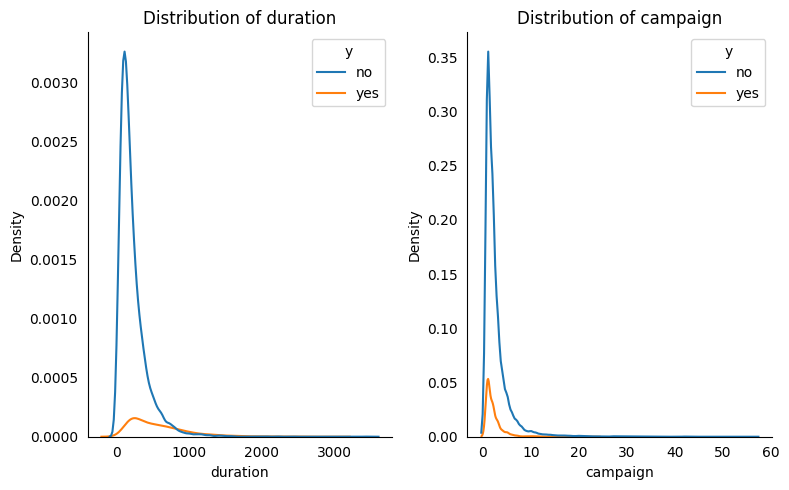

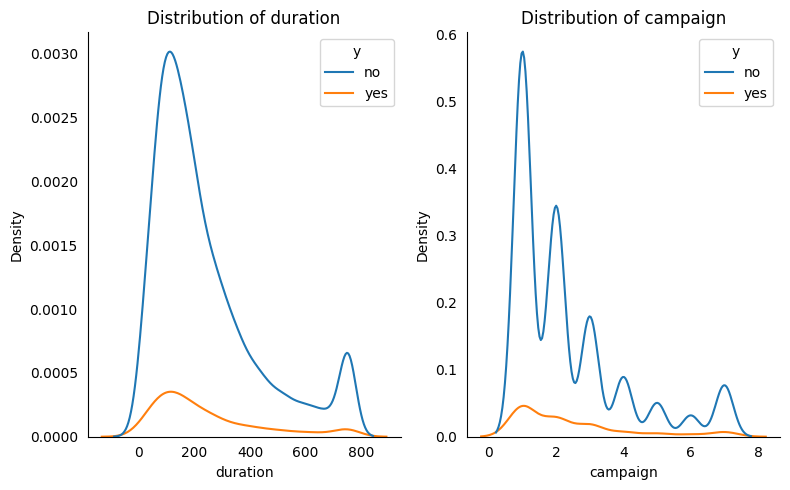

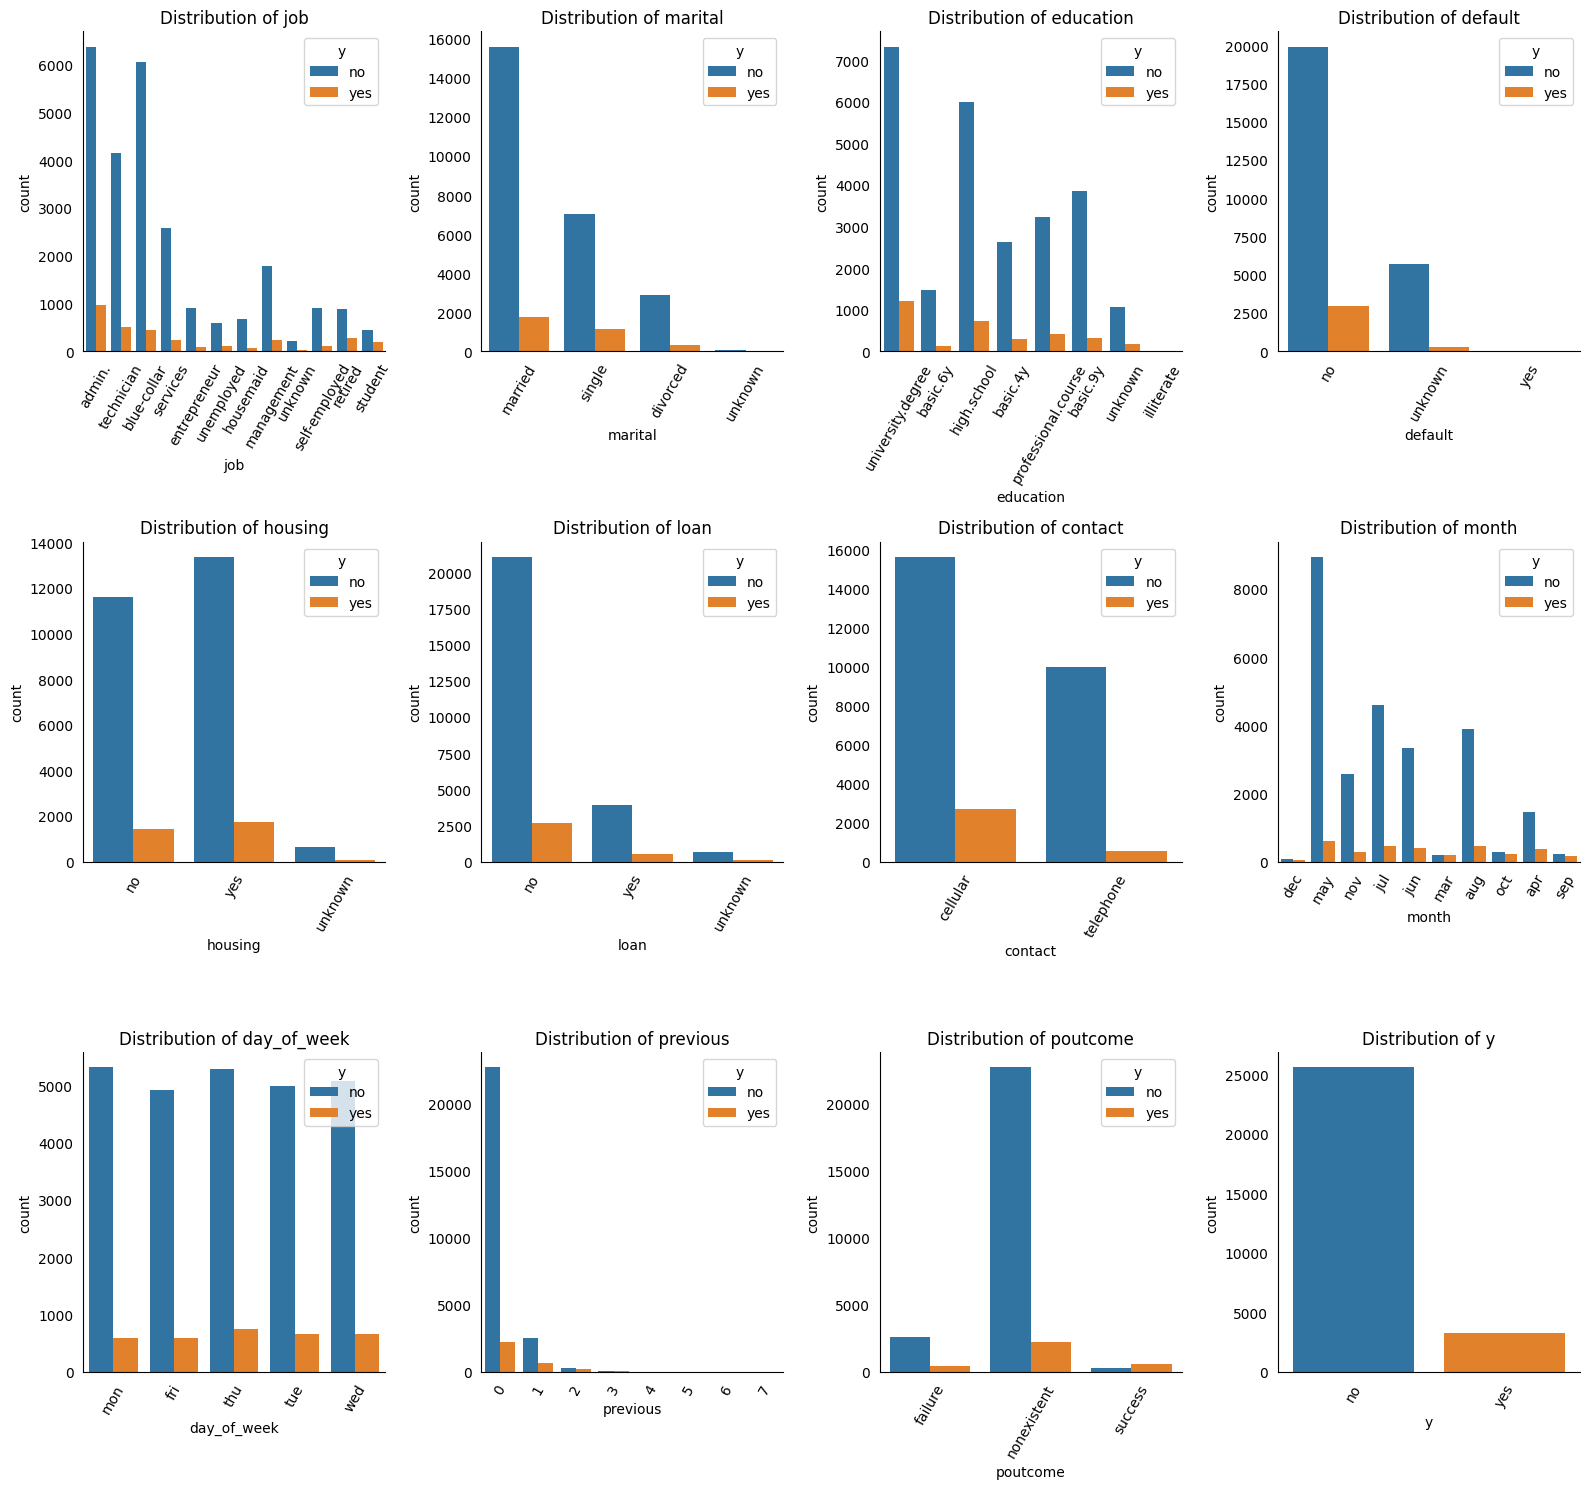

In [ ]:
get_univariate_distribution_plot(df_train, categorical_cols, hue='y', plotType="count", ticks_rotation=60)

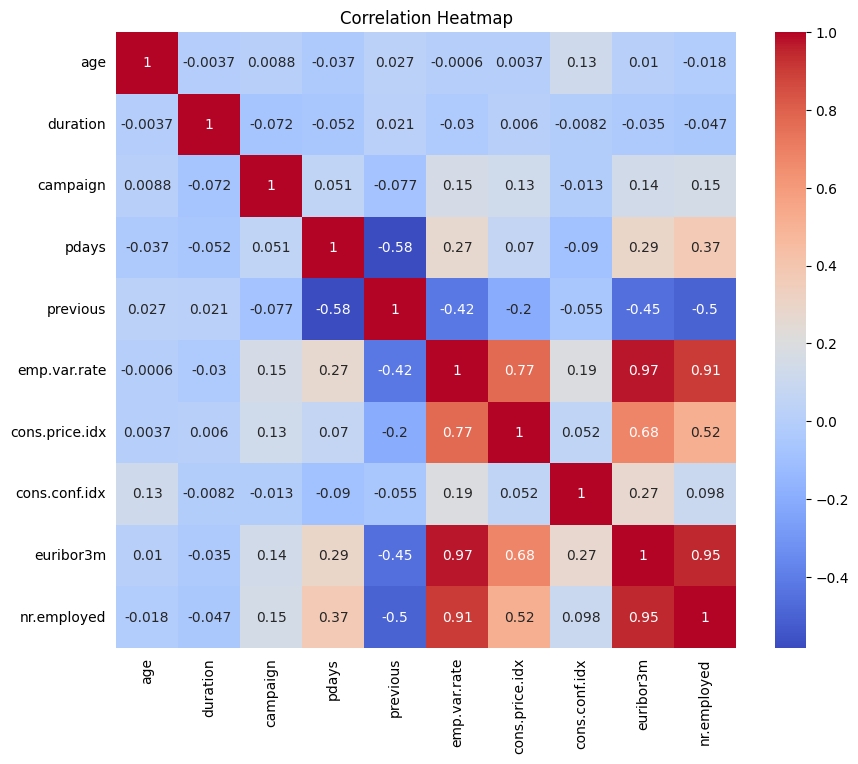

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
ax.set_title('Correlation Heatmap')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.show()

In [ ]:
for col in categorical_cols:
    print(col)

job
marital
education
default
housing
loan
contact
month
day_of_week
previous
poutcome
y


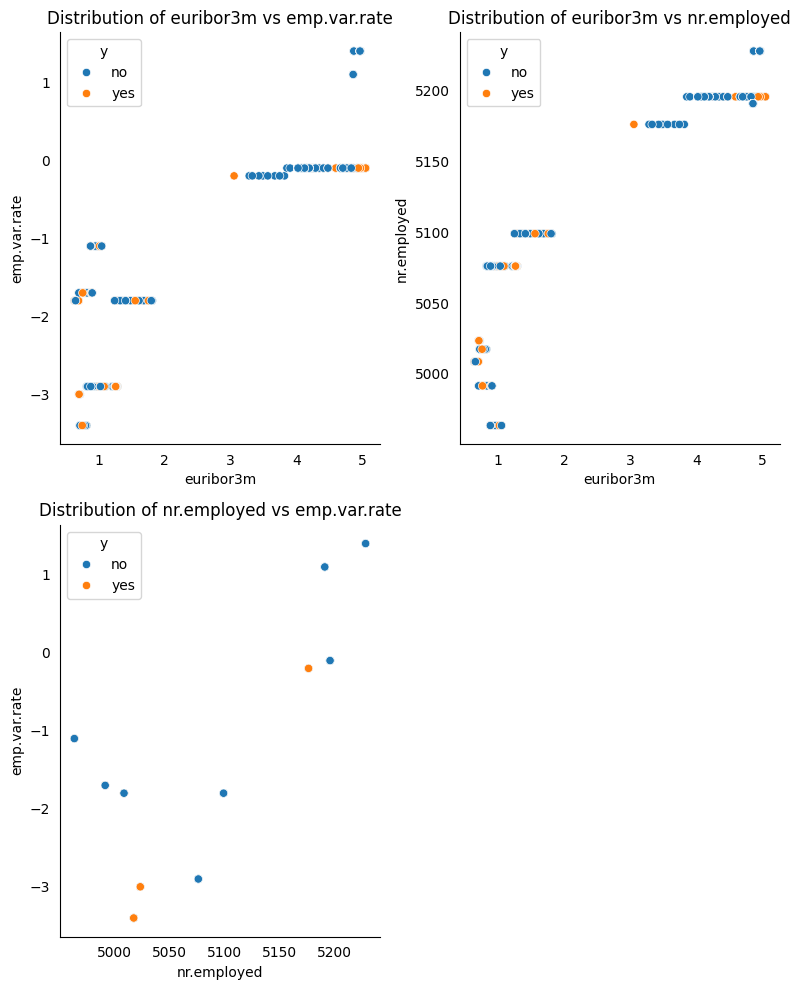

In [ ]:
get_bivariate_distribution_plot(
    df_train,
    column_names=[
        ('euribor3m', 'emp.var.rate'),
        ('euribor3m', 'nr.employed'),
        ('nr.employed', 'emp.var.rate')
    ],
    plotType="scatter",
    hue='y'
)

In [ ]:
# 'euribor3m', 'emp.var.rate' because both are highly dependent on nr.employed
df_train.drop(columns=['euribor3m', 'emp.var.rate'], inplace=True)

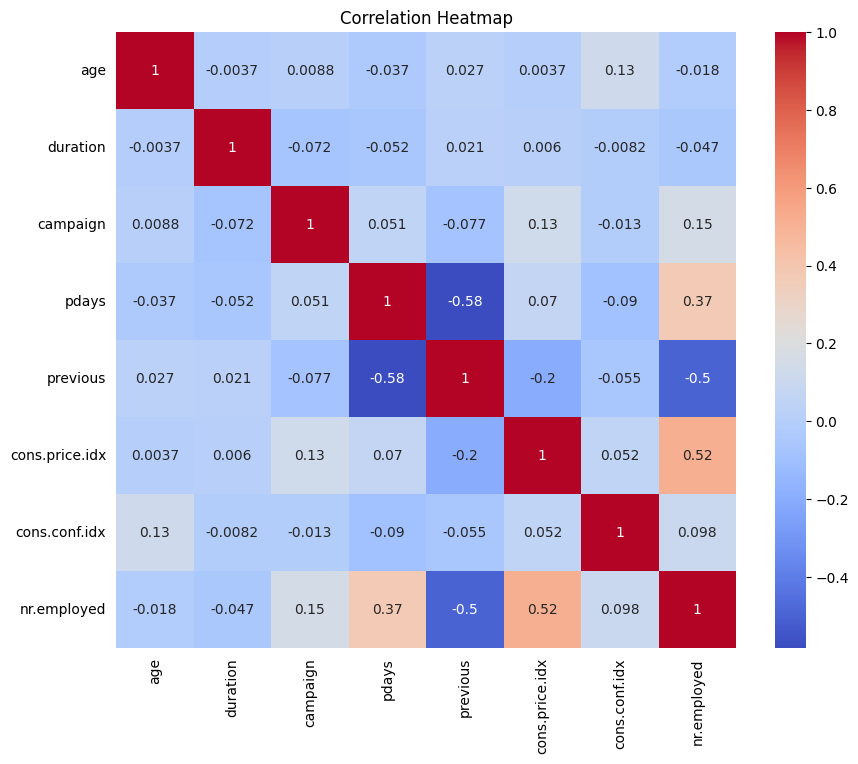

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
ax.set_title('Correlation Heatmap')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.show()

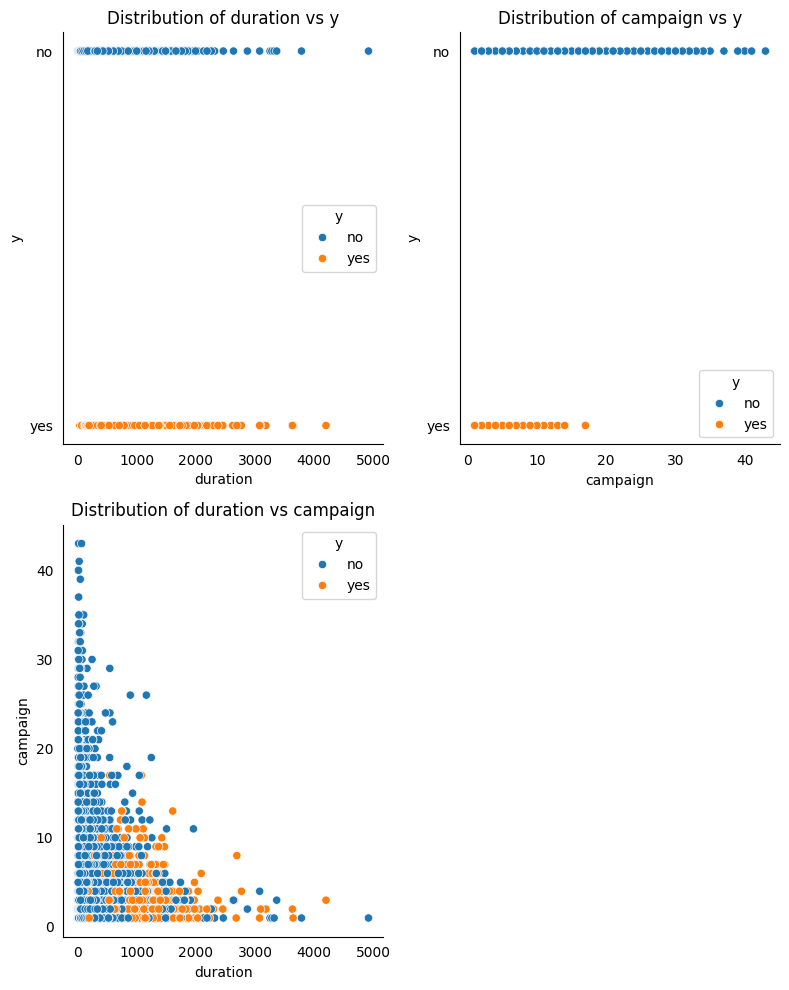

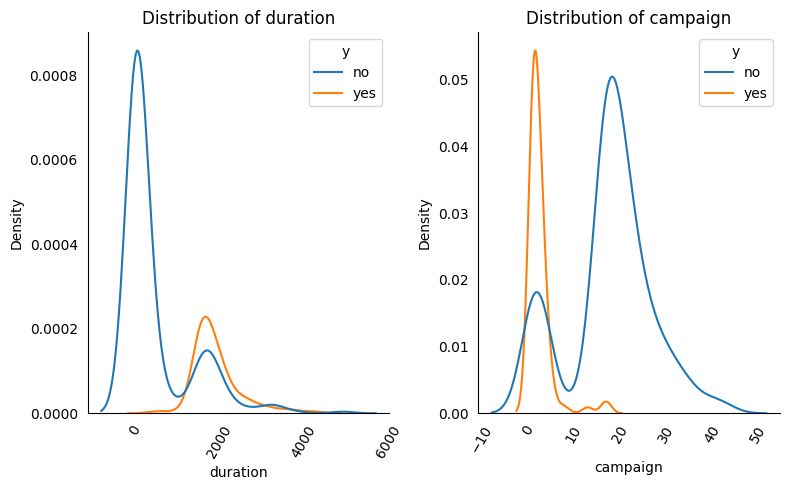

In [ ]:
get_bivariate_distribution_plot(df_train, column_names=[('duration', 'y'), ('campaign', 'y'), ('duration', 'campaign')], plotType="scatter", hue='y')
get_univariate_distribution_plot(df_train[(df_train['duration'] > 1500)|(df_train['campaign'] > 15)], column_names=['duration', 'campaign'], hue='y', plotType="kde", ticks_rotation=60)

For calls which are shorter than 1 min or 1.5 mins, it is most possible that user is going to say no. and for duration 0, which alredy means that we have not called user in this campaign. but if campain value is greater than 0 that means user is going to reject, because after many calls, there is no conversation more than 10-15 seconds, there is rejection, but still it could be happen that last time user was busy at time of call.

For calls more than 1500 seconds or calling more than 15 times there is no point to take them into analysis, because there are very few points whre call is going more than 1500 seconds and for calling multiple times there is catagorically no for that.

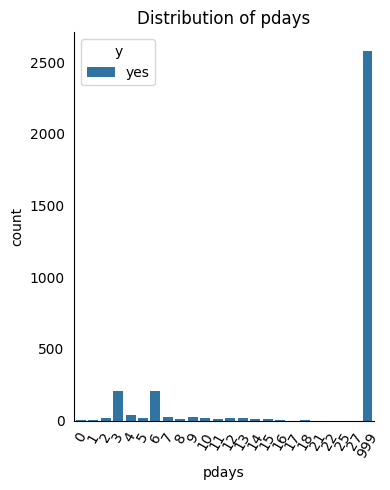

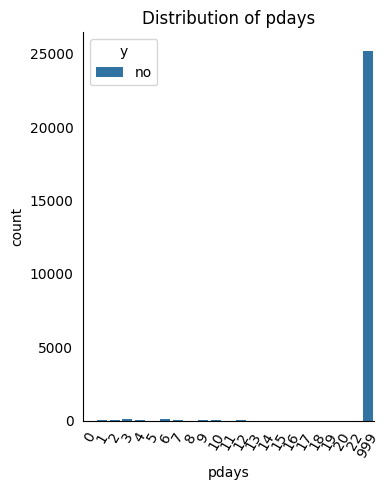

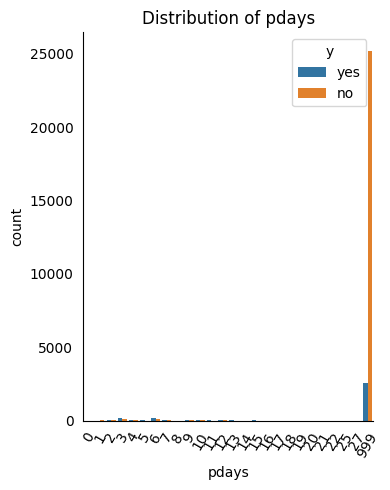

In [ ]:
get_univariate_distribution_plot(df_train[df_train['y']=='yes'], column_names=['pdays'], hue='y', plotType='count', ticks_rotation=60)
get_univariate_distribution_plot(df_train[df_train['y']=='no'], column_names=['pdays'], hue='y', plotType='count', ticks_rotation=60)
get_univariate_distribution_plot(df_train, column_names=['pdays'], hue='y', plotType='count', ticks_rotation=60)

When it has bee a lot of gap from last call rejection is most probable at the time user will say no, for few days like at most 6-10 days, there is chance of 50-50 chance of acceptance or rejection, but for long time its 10 times possible that user is going to say no than yes.

I think this is due to we take a lot time to call, for user the process starts again. User is not interested at that time about what was happened last time.

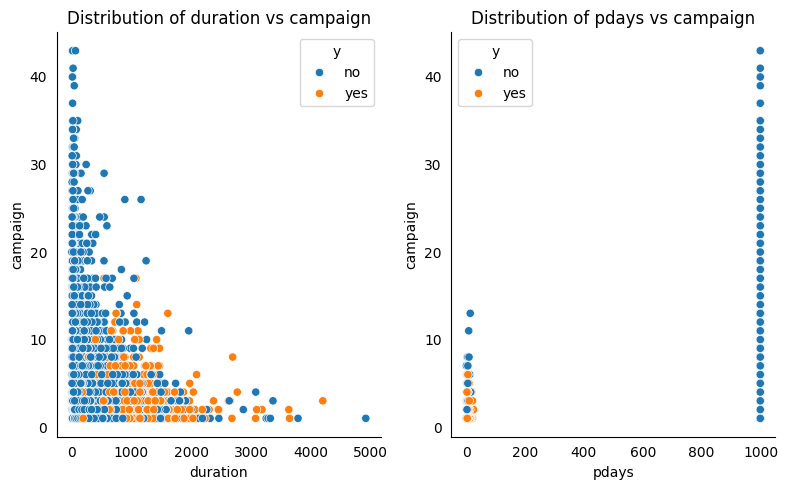

In [ ]:
get_bivariate_distribution_plot(df_train, column_names=[('duration','campaign'), ('pdays', 'campaign'), ], hue='y')

In [ ]:
# Numeric columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# Object columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
# Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'y']

In [ ]:
get_bivariate_distribution_plot()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = convert_discrete_columns_to_category(df_train.drop(columns=['y']))
y = df_train['y']
X_val = convert_discrete_columns_to_category(df_val.drop(columns=['y']))
y_val = df_val['y']

X_test = convert_discrete_columns_to_category(df_test.drop(columns=['y']))
y_test = df_test['y']


dt = DecisionTreeClassifier()
dt.fit(X, y)
y_pred = dt.predict(X_val)
accuracy_score(y_val, y_pred)

ValueError: could not convert string to float: 'admin.'

In [ ]:
# prompt: create a function which takes dataframe and column_names's list as input and plots data till x to y percentile of data in those columns where limits of percentile will give us in arguments

import matplotlib.pyplot as plt
import pandas as pd

def plot_data_within_percentile(df, column_names, x_percentile, y_percentile):
    """
    Plots data within a specified percentile range for given columns in a DataFrame.

    Args:
        df: The input DataFrame.
        column_names: A list of column names to plot.
        x_percentile: The lower percentile limit.
        y_percentile: The upper percentile limit.
    """

    if not isinstance(df, pd.DataFrame):
        raise TypeError("df must be a pandas DataFrame")

    if not isinstance(column_names, list):
      raise TypeError("column_names must be a list")

    if not all(isinstance(col, str) for col in column_names):
        raise ValueError("All elements in column_names must be strings.")

    if not all(col in df.columns for col in column_names):
        raise ValueError("All column names must exist in the DataFrame.")

    for col in column_names:
        if not pd.api.types.is_numeric_dtype(df[col]):
          raise TypeError(f"Column '{col}' is not numeric.")

    if not 0 <= x_percentile <= 100:
        raise ValueError("x_percentile must be between 0 and 100.")

    if not 0 <= y_percentile <= 100:
        raise ValueError("y_percentile must be between 0 and 100.")

    if x_percentile > y_percentile:
        raise ValueError("x_percentile must be less than or equal to y_percentile.")

    for col in column_names:
        lower_limit = df[col].quantile(x_percentile/100)
        upper_limit = df[col].quantile(y_percentile/100)

        filtered_df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

        plt.figure(figsize=(8, 6))
        plt.hist(filtered_df[col], bins=30, edgecolor='k')
        plt.title(f'Distribution of {col} between {x_percentile}th and {y_percentile}th percentiles')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
